In [1]:
import pandas as pd
import matplotlib as plt
import matplotlib.pylab 
from datetime import datetime, timedelta
import numpy as np

In [2]:
data_grid = pd.read_csv(r'./charge_hourly_with_Covid_new.csv')
data_pole = pd.read_csv(r'./charge_hourly_wifi.csv')

In [3]:
data_grid

,Time,Energy_kWh,weekday,hour,hols,is_hol,measure,E_1,E_2,E_3
0,2020-12-02 09:00:00,4.214567,2,10,NaN,False,3.0,NaN,NaN,NaN
1,2020-12-02 10:00:00,0.560625,2,11,NaN,False,3.0,4.214567,NaN,NaN
2,2020-12-02 11:00:00,0.000000,2,12,NaN,False,3.0,0.560625,4.214567,NaN
3,2020-12-02 12:00:00,0.000000,2,13,NaN,False,3.0,0.000000,0.560625,4.214567
4,2020-12-02 13:00:00,0.000558,2,14,NaN,False,3.0,0.000000,0.000000,0.560625
...,...,...,...,...,...,...,...,...,...,...
10883,2022-02-28 20:00:00,0.000000,0,21,Spring holiday,True,0.0,0.000000,0.000000,0.000925
10884,2022-02-28 21:00:00,0.000000,0,22,Spring holiday,True,0.0,0.000000,0.000000,0.000000
10885,2022-02-28 22:00:00,0.000000,0,23,Spring holiday,True,0.0,0.000000,0.000000,0.000000
10886,2022-02-28 23:00:00,0.000000,1,0,Spring holiday,True,0.0,0.000000,0.000000,0.000000


In [4]:
data_pole

,Time,Energy_kWh,weekday,hour,hols,is_hol,R,IC_number,measure,E_1,E_2,E_3
0,2021-01-08 12:00:00,0.187918,4,12,NaN,False,0.92,45.0,1.00,NaN,NaN,NaN
1,2021-01-08 13:00:00,0.000000,4,13,NaN,False,0.92,45.0,1.00,0.187918,NaN,NaN
2,2021-01-08 14:00:00,0.000000,4,14,NaN,False,0.92,45.0,1.00,0.000000,0.187918,NaN
3,2021-01-08 15:00:00,0.000000,4,15,NaN,False,0.92,45.0,1.00,0.000000,0.000000,0.187918
4,2021-01-08 16:00:00,0.000000,4,16,NaN,False,0.92,45.0,1.00,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
9321,2022-01-31 21:00:00,0.000000,0,21,NaN,False,0.96,20.0,0.25,0.000000,0.000000,0.000000
9322,2022-01-31 22:00:00,0.000000,0,22,NaN,False,0.96,20.0,0.25,0.000000,0.000000,0.000000
9323,2022-01-31 23:00:00,0.000000,0,23,NaN,False,0.96,20.0,0.25,0.000000,0.000000,0.000000
9324,2022-02-01 00:00:00,0.000000,1,0,NaN,False,0.93,15.0,0.25,0.000000,0.000000,0.000000


In [5]:
def toTimeStamp(string):
    return pd.Timestamp(string)

data_grid['Time'] = data_grid['Time'].map(toTimeStamp)
data_pole['Time'] = data_pole['Time'].map(toTimeStamp)

In [6]:
data_grid['gap'] = data_grid['Time'].diff()
data_pole['gap'] = data_pole['Time'].diff()

In [7]:
df_grid = data_grid.set_index(['Time'])
df_pole = data_pole.set_index(['Time'])

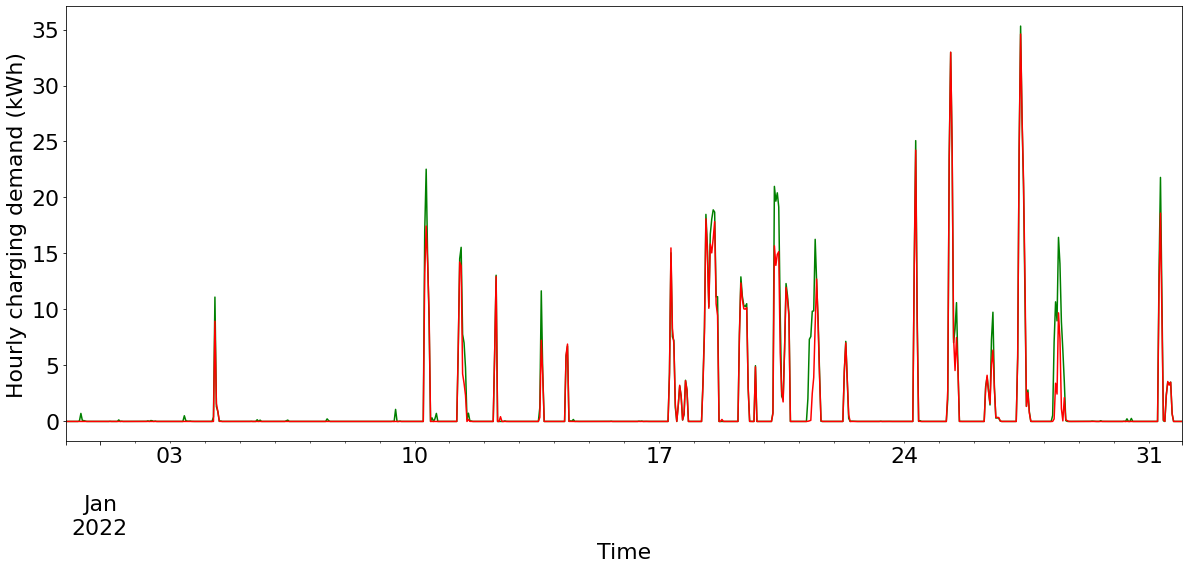

In [8]:
plt.rcParams.update({'font.size': 22})
fig1 = df_grid.loc[(df_grid.index > '2021-12-31') & (df_grid.index < '2022-02-01'),'Energy_kWh'].plot(figsize=(20,8), color='g', ylabel='Hourly charging demand (kWh)')
fig1.xaxis.set_major_locator(plt.dates.MonthLocator())
fig2 = df_pole.loc[(df_pole.index > '2021-12-31') & (df_pole.index < '2022-02-01'),'Energy_kWh'].plot(figsize=(20,8), color='r')
#fig2.xaxis.set_major_locator(plt.dates.MonthLocator())
plt.pyplot.gcf()
plt.pyplot.savefig('ComparePoleGrid.png', bbox_inches="tight")

In [15]:
df_grid.index

DatetimeIndex(['2020-12-02 09:00:00', '2020-12-02 10:00:00',
               '2020-12-02 11:00:00', '2020-12-02 12:00:00',
               '2020-12-02 13:00:00', '2020-12-02 14:00:00',
               '2020-12-02 15:00:00', '2020-12-02 16:00:00',
               '2020-12-02 17:00:00', '2020-12-02 18:00:00',
               ...
               '2022-01-31 15:00:00', '2022-01-31 16:00:00',
               '2022-01-31 17:00:00', '2022-01-31 18:00:00',
               '2022-01-31 19:00:00', '2022-01-31 20:00:00',
               '2022-01-31 21:00:00', '2022-01-31 22:00:00',
               '2022-01-31 23:00:00', '2022-02-01 00:00:00'],
              dtype='datetime64[ns]', name='Time', length=10216, freq=None)